In [1]:
# possiamo considerare due approcci principali: Clustering delle recensioni e Clustering delle birre

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carica i dati se non sono già caricati
# Assumiamo che il DataFrame sia chiamato 'df'
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Seleziona le colonne relative alle caratteristiche delle recensioni
features = ['review_aroma', 'review_taste', 'review_palate', 'review_appearance', 'review_overall']

# Controlla se le colonne esistono nel dataset
if not set(features).issubset(df.columns):
    print("Alcune colonne necessarie non sono presenti nel dataset!")
else:
    # Filtra le colonne selezionate
    review_data = df[features].copy()

    # Controlla i valori mancanti
    print("Valori mancanti:\n", review_data.isnull().sum())

    # Rimuovi le righe con valori mancanti (opzione base, possiamo fare di meglio in seguito)
    review_data = review_data.dropna()

    # Standardizzazione delle caratteristiche
    scaler = StandardScaler()
    review_data_scaled = scaler.fit_transform(review_data)

    print("Standardizzazione completata. Pronto per il clustering.")


Valori mancanti:
 review_aroma         0
review_taste         0
review_palate        0
review_appearance    0
review_overall       0
dtype: int64
Standardizzazione completata. Pronto per il clustering.


In [ ]:
# L'Elbow Method è un metodo grafico per determinare il numero ottimale di cluster in un dataset.
# Si basa sul calcolo dell'inertia (o "somma delle distanze al quadrato" tra i punti e il centroide del loro cluster) per un intervallo di valori 𝑘. k (numero di cluster).
# L'idea è trovare il "gomito" del grafico, dove aggiungere ulteriori cluster non riduce significativamente l'inertia.

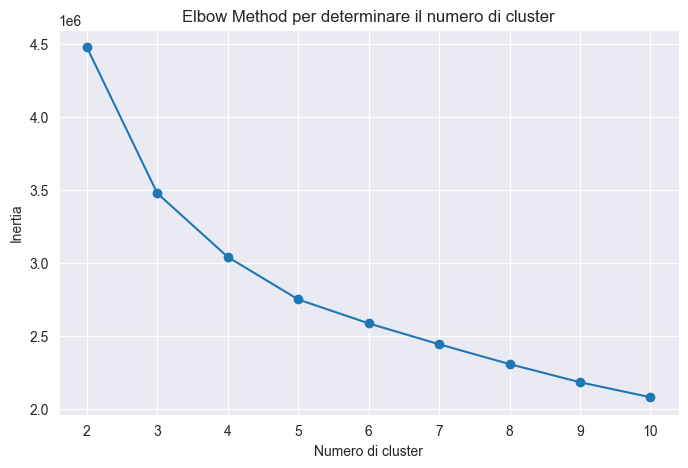

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determina il numero ottimale di cluster usando l'Elbow Method
inertia = []
k_values = range(2, 11)  # Esplora da 2 a 10 cluster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(review_data_scaled)
    inertia.append(kmeans.inertia_)

# Traccia il grafico dell'Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method per determinare il numero di cluster')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Distribuzione dei cluster:
Cluster
3    663593
0    456633
2    298677
1    167711
Name: count, dtype: int64


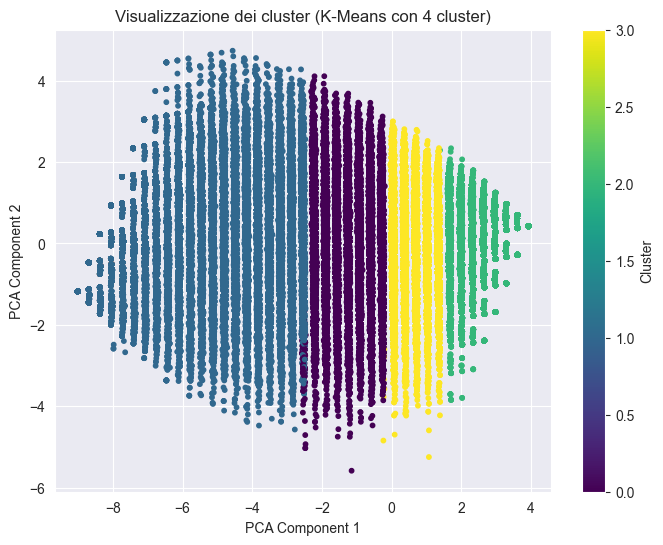

In [3]:
# K-Means con 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(review_data_scaled)

# Aggiungi i cluster ai dati originali
review_data['Cluster'] = clusters

# Analisi dei cluster
print("Distribuzione dei cluster:")
print(review_data['Cluster'].value_counts())

# Visualizzazione dei cluster (riduzione a 2D con PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(review_data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Visualizzazione dei cluster (K-Means con 4 cluster)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [4]:
#Esaminiamo i valori medi delle variabili per ogni cluster per capire come si differenziano
cluster_means = review_data.groupby('Cluster').mean()
print("Medie delle variabili per cluster:")
print(cluster_means)


Medie delle variabili per cluster:
         review_aroma  review_taste  review_palate  review_appearance  \
Cluster                                                                 
0            3.415927      3.433445       3.412907           3.600838   
1            2.523743      2.382223       2.534318           2.905528   
2            4.425170      4.562991       4.441000           4.387941   
3            3.951566      4.050066       3.963130           3.998045   

         review_overall  
Cluster                  
0              3.489476  
1              2.481990  
2              4.536337  
3              4.052616  


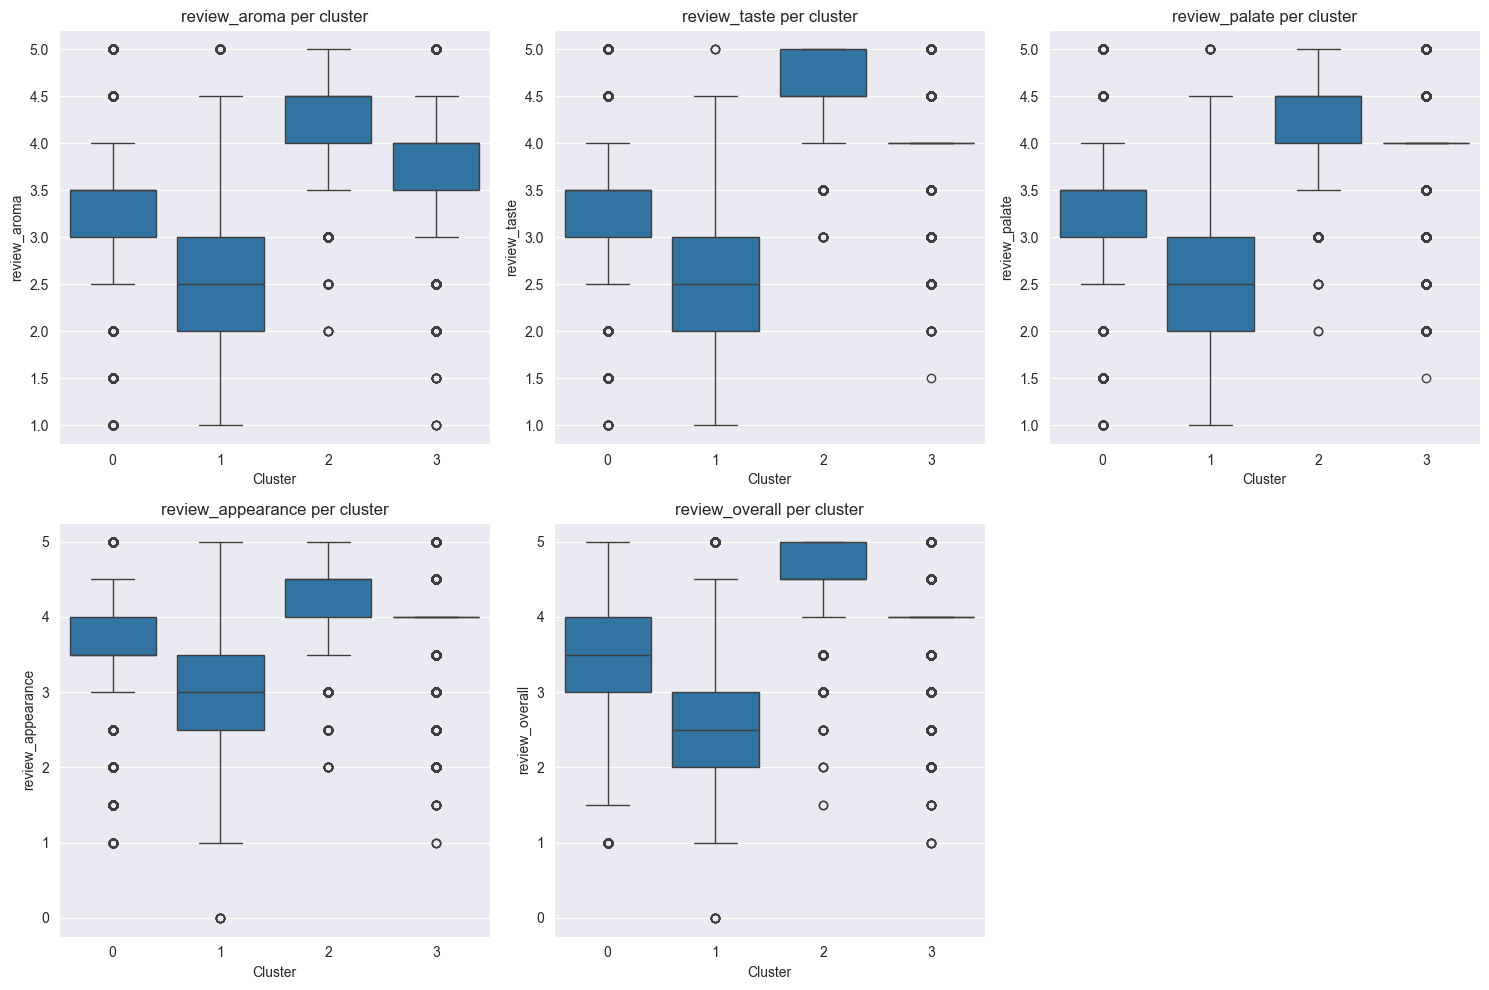

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(['review_aroma', 'review_taste', 'review_palate', 'review_appearance', 'review_overall']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=col, data=review_data)
    plt.title(f"{col} per cluster")
plt.tight_layout()
plt.show()


In [ ]:
#Cluster 0:
#Le medie delle variabili oscillano tra 3.4 e 3.6, con un punteggio overall di circa 3.49.
#Questo cluster rappresenta probabilmente recensioni di birre "mediocri" o nella fascia "sopra la media".

#Cluster 1:
#Tutti i punteggi sono molto bassi (tra 2.3 e 2.9), con un punteggio overall di 2.48.
#Si tratta chiaramente del gruppo di recensioni negative, con utenti insoddisfatti.

#Cluster 2:
#Tutti i punteggi sono molto alti (tra 4.4 e 4.5), con un punteggio overall di 4.53.
#Rappresenta il gruppo delle recensioni estremamente positive, probabilmente birre di alta qualità.

#Cluster 3:
#Punteggi buoni (tra 3.9 e 4.0), con un punteggio overall di 4.05.
#È un cluster di birre generalmente apprezzate, anche se non raggiungono l'eccellenza del Cluster 2.

In [6]:
# Ricarica il dataset originale
review_data = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Verifica le colonne presenti
print(review_data.columns)



Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')


In [7]:
if 'Cluster' in review_data.columns:
    print("Colonna 'Cluster' trovata.")
else:
    print("Colonna 'Cluster' non trovata.")


Colonna 'Cluster' non trovata.


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Colonne da standardizzare
feature_columns = ['review_aroma', 'review_taste', 'review_palate', 'review_appearance', 'review_overall']

# Estrai solo queste colonne
X = review_data[feature_columns]

# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Esegui nuovamente il clustering se necessario
kmeans = KMeans(n_clusters=4, random_state=42)
review_data['Cluster'] = kmeans.fit_predict(X_scaled)


In [15]:
review_data['Cluster'] = cluster_labels


In [9]:
# Riempi valori nulli per beer_style se necessario
review_data['beer_style'] = review_data['beer_style'].fillna('Unknown')

# Mappa i cluster a etichette interpretative
cluster_labels = {
    2: 'Eccellente',
    3: 'Buono',
    0: 'Medio',
    1: 'Negativo'
}
review_data['Cluster_label'] = review_data['Cluster'].map(cluster_labels)

# Analisi degli stili di birra
style_distribution = (
    review_data.groupby(['Cluster_label', 'beer_style'])
    .size()
    .reset_index(name='count')
)
style_distribution = style_distribution.sort_values(['Cluster_label', 'count'], ascending=[True, False])

# Controlla i risultati
print("Distribuzione degli stili di birra:")
print(style_distribution.head())

# Stili più popolari per ogni cluster
top_styles = style_distribution.groupby('Cluster_label').head(5)
print("\nStili più popolari per cluster:")
print(top_styles)


Distribuzione degli stili di birra:
   Cluster_label                      beer_style  count
12         Buono                    American IPA  57184
9          Buono  American Double / Imperial IPA  40369
14         Buono         American Pale Ale (APA)  27406
17         Buono                 American Porter  24190
89         Buono          Russian Imperial Stout  22690

Stili più popolari per cluster:
    Cluster_label                        beer_style  count
12          Buono                      American IPA  57184
9           Buono    American Double / Imperial IPA  40369
14          Buono           American Pale Ale (APA)  27406
17          Buono                   American Porter  24190
89          Buono            Russian Imperial Stout  22690
113    Eccellente    American Double / Imperial IPA  28939
116    Eccellente                      American IPA  26107
193    Eccellente            Russian Imperial Stout  22151
115    Eccellente  American Double / Imperial Stout  21690
121  

In [10]:
print("Controllo delle colonne:")
print("Colonne disponibili:", review_data.columns)

# Controlla se ci sono valori mancanti
print("\nValori nulli in ciascuna colonna:")
print(review_data[['Cluster', 'Cluster_label', 'beer_style']].isnull().sum())

# Controlla i valori unici per Cluster e Cluster_label
print("\nValori unici nella colonna Cluster:")
print(review_data['Cluster'].unique())

print("\nValori unici nella colonna Cluster_label:")
print(review_data['Cluster_label'].unique())

# Controlla un'anteprima della colonna beer_style
print("\nValori unici nella colonna beer_style:")
print(review_data['beer_style'].unique())


Controllo delle colonne:
Colonne disponibili: Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid',
       'Cluster', 'Cluster_label'],
      dtype='object')

Valori nulli in ciascuna colonna:
Cluster          0
Cluster_label    0
beer_style       0
dtype: int64

Valori unici nella colonna Cluster:
[1 3 0 2]

Valori unici nella colonna Cluster_label:
['Negativo' 'Buono' 'Medio' 'Eccellente']

Valori unici nella colonna beer_style:
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / 

In [11]:
cluster_labels = {
    2: 'Eccellente',
    3: 'Buono',
    0: 'Medio',
    1: 'Negativo'
}
review_data['Cluster_label'] = review_data['Cluster'].map(cluster_labels)
print(review_data['Cluster_label'].value_counts())

Cluster_label
Buono         663593
Medio         456633
Eccellente    298677
Negativo      167711
Name: count, dtype: int64


In [12]:
grouped_data = review_data.groupby(['Cluster_label', 'beer_style']).size()
print(grouped_data)


Cluster_label  beer_style                
Buono          Altbier                        3324
               American Adjunct Lager         1468
               American Amber / Red Ale      18885
               American Amber / Red Lager     2202
               American Barleywine           13794
                                             ...  
Negativo       Vienna Lager                   1241
               Weizenbock                      289
               Wheatwine                       164
               Winter Warmer                  1825
               Witbier                        3459
Length: 416, dtype: int64


In [13]:
# Analisi degli stili di birra
style_distribution = (
    review_data.groupby(['Cluster_label', 'beer_style'])
    .size()
    .reset_index(name='count')
)
style_distribution = style_distribution.sort_values(['Cluster_label', 'count'], ascending=[True, False])

# Stili più popolari per ogni cluster
top_styles = style_distribution.groupby('Cluster_label').head(5)
print("\nStili più popolari per cluster:")
print(top_styles)



Stili più popolari per cluster:
    Cluster_label                        beer_style  count
12          Buono                      American IPA  57184
9           Buono    American Double / Imperial IPA  40369
14          Buono           American Pale Ale (APA)  27406
17          Buono                   American Porter  24190
89          Buono            Russian Imperial Stout  22690
113    Eccellente    American Double / Imperial IPA  28939
116    Eccellente                      American IPA  26107
193    Eccellente            Russian Imperial Stout  22151
115    Eccellente  American Double / Imperial Stout  21690
121    Eccellente                   American Porter   9904
220         Medio                      American IPA  28806
222         Medio           American Pale Ale (APA)  22868
210         Medio          American Amber / Red Ale  16710
217         Medio    American Double / Imperial IPA  14000
268         Medio            Fruit / Vegetable Beer  13392
313      Negativo      

In [24]:
review_data['Cluster'] = cluster_labels

In [25]:
# Creiamo la mappatura numerica per i cluster
cluster_map = {
    'Medio': 0,
    'Negativo': 1,
    'Eccellente': 2,
    'Buono': 3
}

# Mappiamo la colonna 'Cluster' usando il dizionario
review_data['Cluster'] = review_data['Cluster'].map(cluster_map)

# Ora possiamo mappare 'Cluster' in 'Cluster_label'
cluster_labels = {
    2: 'Eccellente',
    3: 'Buono',
    0: 'Medio',
    1: 'Negativo'
}

# Mappiamo i numeri nei label
review_data['Cluster_label'] = review_data['Cluster'].map(cluster_labels)

# Verifica se i dati sono stati aggiornati correttamente
print(review_data[['Cluster', 'Cluster_label']].head())


   Cluster Cluster_label
0      0.0         Medio
1      1.0      Negativo
2      2.0    Eccellente
3      3.0         Buono
4      NaN           NaN


In [40]:
print(style_distribution_filtered['beer_style'].value_counts())


Series([], Name: count, dtype: int64)


In [35]:
review_data['beer_style'] = df['beer_style']


In [37]:
style_distribution = (
    review_data.groupby(['Cluster_label', 'beer_style'])
    .size()
    .reset_index(name='count')
)
style_distribution = style_distribution.sort_values(['Cluster_label', 'count'], ascending=[True, False])

# Stili più popolari per ogni cluster
top_styles = style_distribution.groupby('Cluster_label').head(5)
print("\nStili più popolari per cluster:")
print(top_styles)



Stili più popolari per cluster:
  Cluster_label              beer_style  count
0         Buono         German Pilsener      1
1    Eccellente  Foreign / Export Stout      1
2         Medio              Hefeweizen      1
3      Negativo      English Strong Ale      1


In [60]:
abv_distribution = review_data.groupby('Cluster_label')['beer_abv'].describe()
abv_distribution['std'] = abv_distribution['std'].fillna('Non Calcolabile (1 elemento)')
print("\nDistribuzione ABV per cluster:")
print(abv_distribution)


Distribuzione ABV per cluster:
               count  mean                           std  min  25%  50%  75%  \
Cluster_label                                                                  
Buono            1.0   5.0  Non Calcolabile (1 elemento)  5.0  5.0  5.0  5.0   
Eccellente       1.0   6.5  Non Calcolabile (1 elemento)  6.5  6.5  6.5  6.5   
Medio            1.0   5.0  Non Calcolabile (1 elemento)  5.0  5.0  5.0  5.0   
Negativo         1.0   6.2  Non Calcolabile (1 elemento)  6.2  6.2  6.2  6.2   

               max  
Cluster_label       
Buono          5.0  
Eccellente     6.5  
Medio          5.0  
Negativo       6.2  


In [53]:
# Stili più popolari per ogni cluster (tutti)
style_distribution = (
    review_data.groupby(['Cluster_label', 'beer_style'])
    .size()
    .reset_index(name='count')
)
style_distribution = style_distribution.sort_values(['Cluster_label', 'count'], ascending=[True, False])

# Prendi i primi 10 stili per ogni cluster
top_styles = style_distribution.groupby('Cluster_label').head(10)
print("\nStili più popolari per cluster (top 10):")
print(top_styles)



Stili più popolari per cluster (top 10):
  Cluster_label              beer_style  count
0         Buono         German Pilsener      1
1    Eccellente  Foreign / Export Stout      1
2         Medio              Hefeweizen      1
3      Negativo      English Strong Ale      1


In [58]:
abv_distribution = review_data.groupby('Cluster_label')['beer_abv'].agg(['mean', 'std', 'min', 'max', 'count'])
abv_distribution['std'] = abv_distribution['std'].fillna('Non Calcolabile (1 elemento)')

print("\nDistribuzione ABV per cluster:")
print(abv_distribution)



Distribuzione ABV per cluster:
               mean                           std  min  max  count
Cluster_label                                                     
Buono           5.0  Non Calcolabile (1 elemento)  5.0  5.0      1
Eccellente      6.5  Non Calcolabile (1 elemento)  6.5  6.5      1
Medio           5.0  Non Calcolabile (1 elemento)  5.0  5.0      1
Negativo        6.2  Non Calcolabile (1 elemento)  6.2  6.2      1


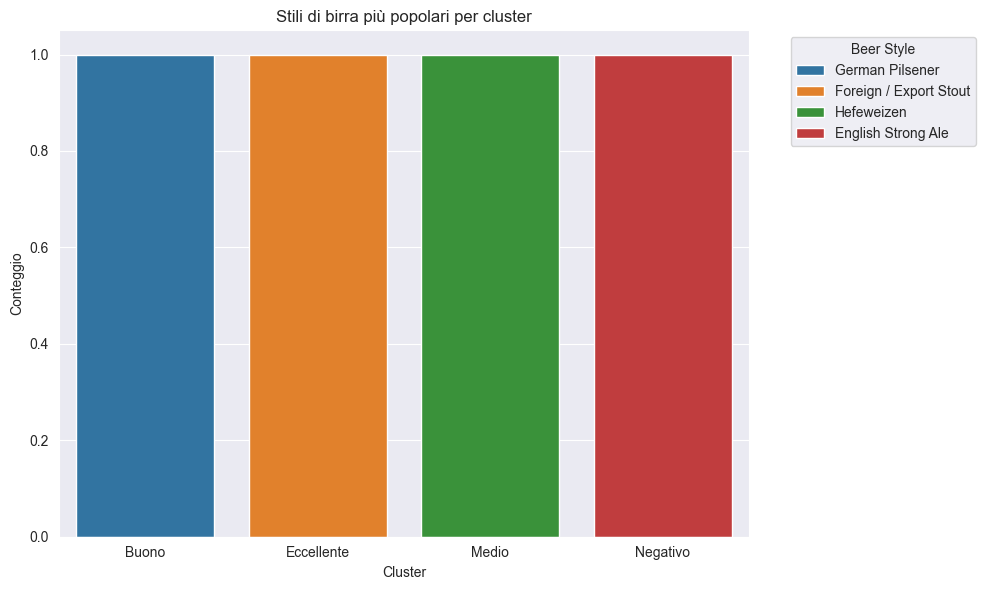

In [42]:
# Distribuzione degli stili di birra
plt.figure(figsize=(10, 6))
sns.barplot(data=top_styles, x='Cluster_label', y='count', hue='beer_style')
plt.title('Stili di birra più popolari per cluster')
plt.ylabel('Conteggio')
plt.xlabel('Cluster')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


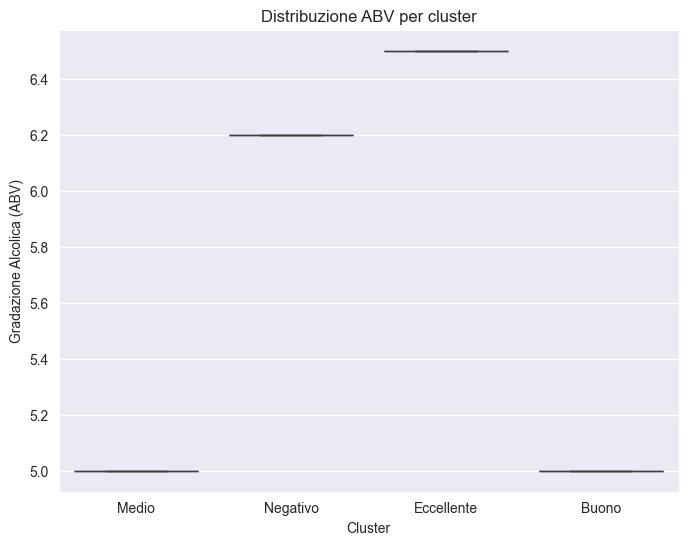

In [43]:
# Boxplot ABV per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=review_data, x='Cluster_label', y='beer_abv')
plt.title('Distribuzione ABV per cluster')
plt.ylabel('Gradazione Alcolica (ABV)')
plt.xlabel('Cluster')
plt.show()
